In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
# Read the data
data = pd.read_csv("data/Master.csv")
data

,Unnamed: 0,zipcode,RegionType,StateName,City,Metro,CountyName,AVERAGE PRICE,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation
0,0,602,Zip,AL,Auburn,Auburn-Opelika,Lee County,114105.2500,9277.0,41.9,42.8,0.134690,0.002796
1,1,606,Zip,MO,Neosho,Joplin,Newton County,59377.7500,5943.0,43.2,43.4,0.068866,0.000000
2,2,610,Zip,KY,Anasco,NaN,Pike County,108219.5833,10220.0,40.4,44.2,0.130349,0.002741
3,3,617,Zip,AL,Imbery,Enterprise,Coffee County,101022.0000,9122.0,39.2,41.0,0.157224,0.005154
4,4,693,Zip,PA,Greensburg,Pittsburgh,Westmoreland County,330761.5000,10536.0,39.2,41.9,0.148064,0.006750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29733,29733,99827,Zip,AK,Haines,NaN,Haines Borough,211487.0000,33387.0,45.2,45.8,0.229525,0.002308
29734,29734,99833,Zip,AK,Petersburg,NaN,Petersburg Borough,254642.9167,33227.0,39.3,42.7,0.219672,0.009211
29735,29735,99835,Zip,AK,Sitka,NaN,Sitka Borough,402391.3333,38423.0,37.2,40.5,0.204494,0.010178
29736,29736,99901,Zip,AK,Ketchikan,Ketchikan,Ketchikan Gateway Borough,294448.8333,34886.0,39.4,39.9,0.170142,0.035648


In [3]:
# Remove strings
data_num = data.drop(columns=['Unnamed: 0','RegionType', 'StateName','City','Metro','CountyName'])
data_num

,zipcode,AVERAGE PRICE,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation
0,602,114105.2500,9277.0,41.9,42.8,0.134690,0.002796
1,606,59377.7500,5943.0,43.2,43.4,0.068866,0.000000
2,610,108219.5833,10220.0,40.4,44.2,0.130349,0.002741
3,617,101022.0000,9122.0,39.2,41.0,0.157224,0.005154
4,693,330761.5000,10536.0,39.2,41.9,0.148064,0.006750
...,...,...,...,...,...,...,...
29733,99827,211487.0000,33387.0,45.2,45.8,0.229525,0.002308
29734,99833,254642.9167,33227.0,39.3,42.7,0.219672,0.009211
29735,99835,402391.3333,38423.0,37.2,40.5,0.204494,0.010178
29736,99901,294448.8333,34886.0,39.4,39.9,0.170142,0.035648


In [4]:
data_num.set_index('zipcode',inplace=True)
data_num

,AVERAGE PRICE,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation
zipcode,,,,,,
602,114105.2500,9277.0,41.9,42.8,0.134690,0.002796
606,59377.7500,5943.0,43.2,43.4,0.068866,0.000000
610,108219.5833,10220.0,40.4,44.2,0.130349,0.002741
617,101022.0000,9122.0,39.2,41.0,0.157224,0.005154
693,330761.5000,10536.0,39.2,41.9,0.148064,0.006750
...,...,...,...,...,...,...
99827,211487.0000,33387.0,45.2,45.8,0.229525,0.002308
99833,254642.9167,33227.0,39.3,42.7,0.219672,0.009211
99835,402391.3333,38423.0,37.2,40.5,0.204494,0.010178


In [5]:
# Assess data types
data_num.dtypes

AVERAGE  PRICE            float64
Income per capita         float64
Median Age Male           float64
Median Age Female         float64
Bachelor's degree > 25    float64
Public transportation     float64
dtype: object

In [6]:
# Find any Nan
data_num.isnull().values.any()

True

In [7]:
data_num.dropna( inplace=True)

In [8]:
data_num.isnull().values.any()

False

In [9]:
# Scale features
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data_num)
data_transformed = mms.transform(data_num)

In [10]:
# Initialize k-means
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

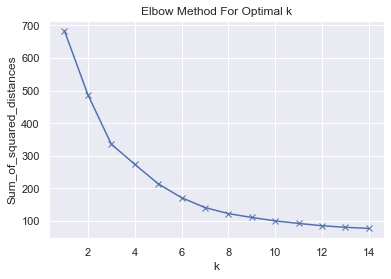

In [11]:
# Determine optimal clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
# We chose 5 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

In [14]:
# Perform prediction
data_predict = data_num['clusters'] = kmeans.fit_predict(data_num)

In [15]:
data_predict

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# View cluster predictions
data_num

,AVERAGE PRICE,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation,clusters
zipcode,,,,,,,
602,114105.2500,9277.0,41.9,42.8,0.134690,0.002796,0
606,59377.7500,5943.0,43.2,43.4,0.068866,0.000000,0
610,108219.5833,10220.0,40.4,44.2,0.130349,0.002741,0
617,101022.0000,9122.0,39.2,41.0,0.157224,0.005154,0
693,330761.5000,10536.0,39.2,41.9,0.148064,0.006750,0
...,...,...,...,...,...,...,...
99827,211487.0000,33387.0,45.2,45.8,0.229525,0.002308,0
99833,254642.9167,33227.0,39.3,42.7,0.219672,0.009211,0
99835,402391.3333,38423.0,37.2,40.5,0.204494,0.010178,0


In [17]:
#from sklearn.decomposition import PCA
#reduced_data = PCA(n_components=2).fit_transform(data_num)
#results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

#sns.scatterplot(x="pca1", y="pca2", hue=data_num['clusters'], data=results)
#plt.title('K-means Clustering with 2 dimensions')
#plt.show()

In [18]:
# Export to csv for manual assessment
data_num.to_csv('data/cluster_predict.csv')